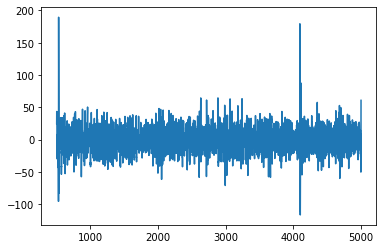

In [3]:
import numpy as np
from scipy.signal import butter, sosfilt, sosfreqz
import sys
import matplotlib.pyplot as plt

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq_freq = 0.5 * fs
    low = lowcut / nyq_freq
    high = highcut / nyq_freq
    sos = butter(order, [low, high], analog=False, btype='band', output='sos')
    return sos

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    sos = butter_bandpass(lowcut, highcut, fs, order=order)
    y = sosfilt(sos, data)
    return y

def read_binary(FILE_PATH):
    myarray = np.fromfile(FILE_PATH, dtype=int)
    return myarray[:3000]

channels = dict()
arr = read_binary('d533101.dat')
#arr = butter_bandpass_filter(arr, 300, 7500, fs = 10000)
#arr = arr - np.median(arr)
num_arr = list()
cnt = 0
try:
    with open("d533101.dat", "rb") as f:
        byte = f.read(2)
        while byte:
            byte = f.read(2)
            num = int.from_bytes(byte, byteorder = sys.byteorder)
            cnt = cnt % 8
            channel_name = "channel%s" %(str(cnt+1))
            #Initialized Channels
            if channel_name not in channels:
                channels[channel_name] = list()
            else:
                channels[channel_name].append(num)
            cnt += 1

except IOError:
     print('Error While Opening the file!')

lst = channels["channel1"]
lst = butter_bandpass_filter(lst, 300, 4900, fs = 10000)
lst = lst - np.median(lst)
fig, ax = plt.subplots() 
ax.plot(range(500,5000), lst[500:5000])
plt.show()